## Capstone project notebook: Clustering Toronto neighborhoods (week #3)

By Yerdos Kulnazarov 

This notebook will be used for the capstone project assignment for week #3

### Part 1: Creating the dataframe

In [21]:
#import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import json # library to handle JSON files

In [22]:
#retrienving the URL and creating a Beautiful soup object
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(URL).text
soup = BeautifulSoup(html_data, 'html5lib')
#print(soup.prettify())

#### Now we are going to obtain the data and group the neighborhoods by postal code

In [23]:
#extract data from table
table_contents = []
table = soup.find('table')
#for row in table.findAll('td'):
for row in table.find_all('td'):
    cell = {}
    if row.span.text == 'Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace('/', ',')).replace(')', ' ')).strip(' ')
        table_contents.append(cell)

In [24]:
#print (table_contents)
df = pd.DataFrame(table_contents)
df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                       'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                       'EtobicokeNorthwest':'Etobicoke Northwest',
                       'East YorkEast Toronto':'East York/East Toronto',
                       'MississaugaCanada Post Gateway Processing Centre':'Mississauga'}, inplace = True)

print('Number of unique postal codes: ', len(df.PostalCode.unique()))
print('Number of unique boroughs: ', len(df.Borough.unique()))
df.head()

Number of unique postal codes:  103
Number of unique boroughs:  15


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [25]:
# check for duplicates (postal codes), null values and neighborhood == 'not assigned'
print(df[df.duplicated(['PostalCode'], keep = 'first')])
print(df['Neighborhood'].isnull().sum())
print(df['Neighborhood'].str.contains('Not_assigned').sum())
print(df['Neighborhood'].str.contains('NotAssigned').sum())

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []
0
0
0


In [26]:
print('Shape: ', df.shape)

Shape:  (103, 3)


### Part 2: Getting the geographical coordinates to create the final dataframe

In [27]:
# read CSV file
lat_lng_coords = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
print(lat_lng_coords.shape)
lat_lng_coords.head()

(103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [28]:
# set proper name for column
lat_lng_coords.rename(columns = {'Postal Code': 'PostalCode'}, inplace = True)

print(df.columns)
print(lat_lng_coords.columns)

Index(['PostalCode', 'Borough', 'Neighborhood'], dtype='object')
Index(['PostalCode', 'Latitude', 'Longitude'], dtype='object')


In [29]:
# merge dataframes
toronto_neighborhoods = pd.merge(left = df, right = lat_lng_coords, left_on = 'PostalCode', right_on = 'PostalCode')
toronto_neighborhoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Part 3: Exploring and clustering the neighborhoods

In [30]:
pip install "geopy==1.21.0"

Note: you may need to restart the kernel to use updated packages.


In [31]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
# import additional libraries
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.cluster import  KMeans
from geopy.geocoders import Nominatim
import folium

In [33]:
# verify again number of boroughs/postal codes in the dataset
print('The dataframe has {} boroughs and {} unique postal codes.'.format(
        len(toronto_neighborhoods['Borough'].unique()),
        toronto_neighborhoods.shape[0]
    )
)

The dataframe has 15 boroughs and 103 unique postal codes.


#### Get the latitude and longitude values of Toronto.

In [34]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods (gouped by postal code) superimposed on top.

In [35]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Borough'], toronto_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### As stated in the assigment, let's use only boroughs that contain the word 'Toronto'

In [36]:
toronto_neighborhoods = toronto_neighborhoods[toronto_neighborhoods['Borough'].str.contains('Toronto')]
toronto_neighborhoods.reset_index(drop = True, inplace = True)

print('The dataframe has now {} boroughs and {} unique postal codes.'.format(
        len(toronto_neighborhoods['Borough'].unique()),
        toronto_neighborhoods.shape[0]
    )
)
toronto_neighborhoods

The dataframe has now 7 boroughs and 39 unique postal codes.


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


In [37]:
# check again for duplicates and null values in dataframe
print('Null and duplicated longitudes')
print(toronto_neighborhoods['Longitude'].isnull().sum())
print(len(toronto_neighborhoods['Longitude'].unique()))
print(toronto_neighborhoods[toronto_neighborhoods.duplicated(['Longitude'], keep = 'first')])
print()
print('Null and duplicated latitudes')
print(toronto_neighborhoods['Latitude'].isnull().sum())
print(len(toronto_neighborhoods['Latitude'].unique()))
print(toronto_neighborhoods[toronto_neighborhoods.duplicated(['Latitude'], keep = 'first')])


Null and duplicated longitudes
0
34
   PostalCode           Borough  \
24        M5R   Central Toronto   
26        M4S   Central Toronto   
30        M5T  Downtown Toronto   
31        M4V   Central Toronto   
37        M4Y  Downtown Toronto   

                                         Neighborhood   Latitude  Longitude  
24              The Annex , North Midtown , Yorkville  43.672710 -79.405678  
26                                         Davisville  43.704324 -79.388790  
30        Kensington Market , Chinatown , Grange Park  43.653206 -79.400049  
31  Summerhill West , Rathnelly , South Hill , For...  43.686412 -79.400049  
37                               Church and Wellesley  43.665860 -79.383160  

Null and duplicated latitudes
0
39
Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood, Latitude, Longitude]
Index: []


#### Define Foursquare Credentials and Version

In [38]:
CLIENT_ID = 'BX2CGMZAYPNUWLVA5VW5FQ1LYVCX3FCMTZJV42I3A23IP42D' # your Foursquare ID
CLIENT_SECRET = 'KG5LF2U3NRU1XTFH0OVN2CJ4H5T1ZZWPH1IZ4HXGFXWH13FC' # your Foursquare Secret
ACCESS_TOKEN = 'DDXHRCOEXQECVXPTXJTXMLN3N3LZZNWLUV3DUH0OWMCRBY1H' # your FourSquare Access Token
VERSION = '20210415' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BX2CGMZAYPNUWLVA5VW5FQ1LYVCX3FCMTZJV42I3A23IP42D
CLIENT_SECRET: KG5LF2U3NRU1XTFH0OVN2CJ4H5T1ZZWPH1IZ4HXGFXWH13FC


#### Let's explore the first postal code in our dataframe.

Get the neighborhood's names, latitude and longitude for the first postal code.

In [39]:
toronto_neighborhoods.loc[0, 'Neighborhood']

'Regent Park , Harbourfront'

In [40]:
neighborhood_latitude = toronto_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of first postal code ({}) are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of first postal code (Regent Park , Harbourfront) are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in the firts postal code within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [41]:
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=BX2CGMZAYPNUWLVA5VW5FQ1LYVCX3FCMTZJV42I3A23IP42D&client_secret=KG5LF2U3NRU1XTFH0OVN2CJ4H5T1ZZWPH1IZ4HXGFXWH13FC&ll=43.6542599,-79.3606359&v=20210415&radius=500&limit=100'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60a0ba310a621a20f147a99f'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 48,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

From the Foursquare lab, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.

In [44]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues#.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980
5,Corktown Common,Park,43.655618,-79.356211
6,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
7,The Extension Room,Gym / Fitness Center,43.653313,-79.359725
8,The Distillery Historic District,Historic Site,43.650244,-79.359323
9,SOMA chocolatemaker,Chocolate Shop,43.650622,-79.358127


And how many venues were returned by Foursquare?

In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


#### Explore postal neighborhoods and segment them

Let's create a function to repeat the same process to all the postal codes with boroughs that contain the word 'Toronto'

In [46]:
# function to get the top 100 venues that are in a radius of 500 meters of each postal code 
# and their categories from foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

Run the above function on each neighborhood/postal code and create a new dataframe called _toronto_venues_.

In [47]:
toronto_venues = getNearbyVenues(names = toronto_neighborhoods['Neighborhood'], latitudes = toronto_neighborhoods['Latitude'], longitudes = toronto_neighborhoods['Longitude'], radius=500)

Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Dufferin , Dovercourt Village
The Danforth  East
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
The Danforth West , Riverdale
Toronto Dominion Centre , Design Exchange
Brockton , Parkdale Village , Exhibition Place
India Bazaar , The Beaches West
Commerce Court , Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park , The Junction South
North Toronto West
The Annex , North Midtown , Yorkville
Parkdale , Roncesvalles
Davisville
University of Toronto , Harbord
Runnymede , Swansea
Moore Park , Summerhill East
Kensington Market , Chinatown , Grange Park
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Rosedale
Enclave of M5E
St. Jame

Let's check the size of the resulting dataframe

In [48]:
print(toronto_venues.shape)
toronto_venues.head()

(1572, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park , Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Let's check how many venues were returned by postal code

In [49]:
print(len(toronto_venues['Neighborhood'].unique()), 'postal codes')
toronto_venues.groupby('Neighborhood').count()

38 postal codes


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton , Parkdale Village , Exhibition Place",22,22,22,22,22,22
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport",17,17,17,17,17,17
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33
Davisville North,8,8,8,8,8,8


Let's find out how many unique categories can be curated from all the returned venues

In [50]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 230 uniques categories.


#### Analize each postal code (and neighborhoods asociated to each of them)

In [51]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#print the new dataframe size and some rows (neighborhood column is in the middle)
print(toronto_onehot.shape)
toronto_onehot.head()

(1572, 230)


,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Next, let's group rows by postal code and by taking the mean of the frequency of occurrence of each category

In [52]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.017241,0.051724,0.000000,0.000000,0.00,0.017241,0.017241,0.000000,0.034483,0.000000,0.000000,0.017241,0.00,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000,0.017241,0.000000,0.0000,0.000000,0.034483,0.000000,0.000000,0.00,0.000000,0.017241,0.068966,0.103448,0.000000,0.000000,0.00,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.0000

In [53]:
toronto_grouped.shape

(38, 230)

Let's print neighborhoodos by postal code along with the top 5 most common venues

In [54]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.07
2              Bakery  0.05
3      Farmers Market  0.03
4  Seafood Restaurant  0.03


----Brockton , Parkdale Village , Exhibition Place----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3   Grocery Store  0.05
4          Bakery  0.05


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport----
                 venue  freq
0      Airport Service  0.18
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3  Rental Car Location  0.06
4                Plane  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.20
1                Café  0.07
2      Sandwich Place  0.07
3  Italian Restaurant  0.05
4        Burger Joint  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1                Café  0.19
2             

#### Let's put that into a _pandas_ dataframe

First, let's write a function to sort the venues in descending order.

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each postal code.

In [56]:
num_top_venues = 10

#endings for ordinal numbers
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe with headers populated 
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
# populate firrt column
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

# populate empty columns
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Cheese Shop,Pharmacy,Restaurant,Grocery Store
1,"Brockton , Parkdale Village , Exhibition Place",Café,Coffee Shop,Breakfast Spot,Pet Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Grocery Store,Bakery
2,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Boutique,Rental Car Location,Plane,Coffee Shop,Sculpture Garden
3,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Japanese Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Yoga Studio,Discount Store
4,Christie,Grocery Store,Café,Park,Baby Store,Restaurant,Candy Store,Coffee Shop,Athletics & Sports,Italian Restaurant,Nightclub


### Clustering the neighborhoods

First, let's find the best number of clusters using the elbow method

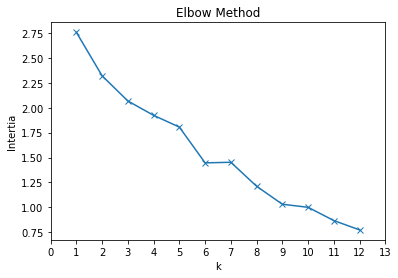

In [57]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
intertia = []
K = range(1,13)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    intertia.append(km.inertia_)
    
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(14))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

Based on the "elbow", using **4-6 clusters** seems to be a good choice

Now let's run _k_-means to cluster the neighborhoods into the selected number of clusters.

In [58]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init = 'k-means++', n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each postal code.

In [59]:
# add cluster labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neighborhoods

# merge toronto_neighborhoods with neighborhoods_venues_sorted to add latitude/longitude for each postal code

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Restaurant,Theater,Café,Breakfast Spot,Pub,Mexican Restaurant,Farmers Market
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Coffee Shop,Clothing Store,Italian Restaurant,Hotel,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Movie Theater
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Café,Coffee Shop,Gastropub,Cosmetics Shop,Cocktail Bar,Cheese Shop,Department Store,Hotel,Farmers Market,Restaurant
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,Trail,Health Food Store,Pub,Wine Shop,Deli / Bodega,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Cheese Shop,Pharmacy,Restaurant,Grocery Store


In [60]:
# check if all clusters have at least one postal code asociated (aoutput must be equal to number of selected clusters)
len(toronto_merged['Cluster Labels'].unique())

7

Finally, let's visualize the resulting clusters

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster + 1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

### Examine Clusters

Examine each cluster and get a sense of the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",0.0,Coffee Shop,Park,Bakery,Restaurant,Theater,Café,Breakfast Spot,Pub,Mexican Restaurant,Farmers Market
1,M5B,Downtown Toronto,"Garden District, Ryerson",0.0,Coffee Shop,Clothing Store,Italian Restaurant,Hotel,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Movie Theater
2,M5C,Downtown Toronto,St. James Town,0.0,Café,Coffee Shop,Gastropub,Cosmetics Shop,Cocktail Bar,Cheese Shop,Department Store,Hotel,Farmers Market,Restaurant
3,M4E,East Toronto,The Beaches,0.0,Trail,Health Food Store,Pub,Wine Shop,Deli / Bodega,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
4,M5E,Downtown Toronto,Berczy Park,0.0,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Beer Bar,Seafood Restaurant,Cheese Shop,Pharmacy,Restaurant,Grocery Store
5,M5G,Downtown Toronto,Central Bay Street,0.0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Japanese Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Yoga Studio,Discount Store
6,M6G,Downtown Toronto,Christie,0.0,Grocery Store,Café,Park,Baby Store,Restaurant,Candy Store,Coffee Shop,Athletics & Sports,Italian Restaurant,Nightclub
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",0.0,Coffee Shop,Café,Restaurant,Thai Restaurant,Deli / Bodega,Clothing Store,Gym,Salad Place,Burrito Place,Bakery
8,M6H,West Toronto,"Dufferin , Dovercourt Village",0.0,Pharmacy,Bakery,Grocery Store,Supermarket,Park,Music Venue,Middle Eastern Restaurant,Café,Brewery,Liquor Store
10,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",0.0,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Brewery,Sporting Goods Shop,Restaurant,Fried Chicken Joint,Scenic Lookout


#### Cluster 2

In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,M5N,Central Toronto,Roselawn,1.0,Fast Food Restaurant,Home Service,Garden,Music Venue,Wine Shop,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 3

In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,M4W,Downtown Toronto,Rosedale,2.0,Park,Playground,Trail,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


#### Cluster 4

In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,M4J,East York/East Toronto,The Danforth East,3.0,Park,Pizza Place,Convenience Store,Metro Station,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### Cluster 5

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M4N,Central Toronto,Lawrence Park,4.0,Park,Bus Line,Swim School,Business Service,Comfort Food Restaurant,Comic Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 6

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,M5P,Central Toronto,Forest Hill North & West,5.0,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Wine Shop,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
